# Representing a Scalar

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.neurons import LIF
from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot

In [28]:
net = nengo.Network(label="Scalar Representation")
with net:
    stim = nengo.Node(lambda t: np.sin(16 * t), label="Input")
    scalar = nengo.Ensemble(n_neurons=100, dimensions=1, radius=1, neuron_type=LIF(), max_rates=Uniform(100, 200),  label="x")
    nengo.Connection(stim, scalar)
    stim_probe = nengo.Probe(stim)
    spikes = nengo.Probe(scalar.neurons)
    filtered = nengo.Probe(scalar.neurons, synapse=0.01)
    filtered_ensemble = nengo.Probe(scalar, synapse=0.01)


In [29]:

t_max = 1
with nengo.Simulator(net) as sim:
    sim.run(t_max)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

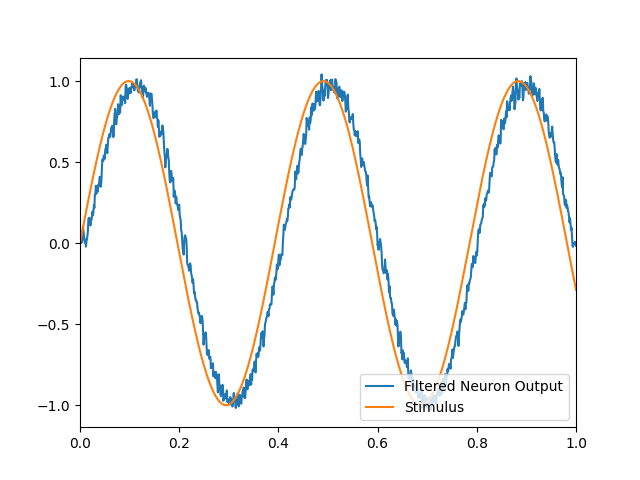

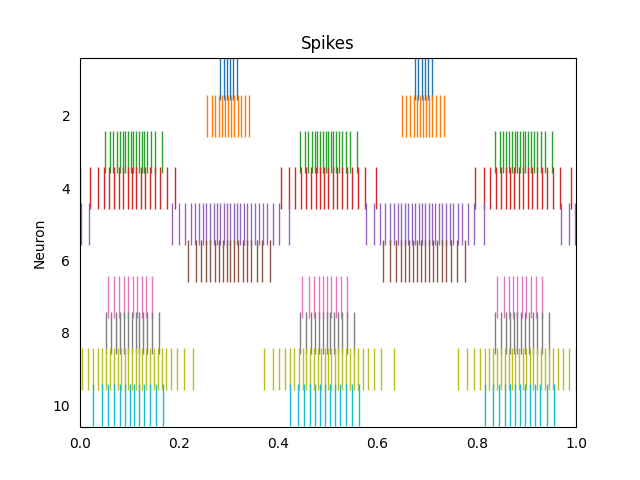

In [31]:
plt.figure()
plt.plot(sim.trange(), sim.data[filtered_ensemble])
plt.plot(sim.trange(), sim.data[stim_probe])
plt.legend(["Filtered Neuron Output", "Stimulus"], loc="lower right")
plt.xlim(0, t_max)

plt.figure()
rasterplot(sim.trange(), sim.data[spikes][:, :10])
plt.ylabel("Neuron")
plt.title("Spikes")
plt.xlim(0, t_max)

Now if we increase the range of the input without adjusting the radius then we will see saturation.

In [38]:
net = nengo.Network(label="Scalar Representation Saturated")
with net:
    stim = nengo.Node(lambda t: 4 * np.sin(16 * t), label="Input")
    scalar = nengo.Ensemble(n_neurons=100, dimensions=1, radius=1, neuron_type=LIF(), max_rates=Uniform(100, 200),  label="x")
    nengo.Connection(stim, scalar)
    stim_probe = nengo.Probe(stim)
    spikes = nengo.Probe(scalar.neurons)
    filtered = nengo.Probe(scalar.neurons, synapse=0.01)
    filtered_ensemble = nengo.Probe(scalar, synapse=0.01)

In [39]:
t_max = 1
with nengo.Simulator(net) as sim:
    sim.run(t_max)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

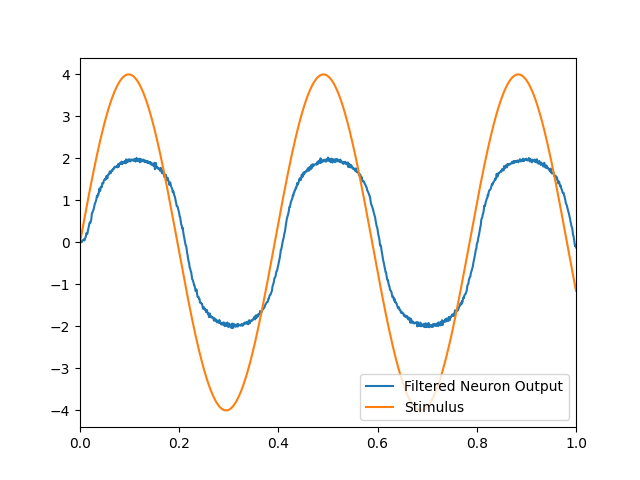

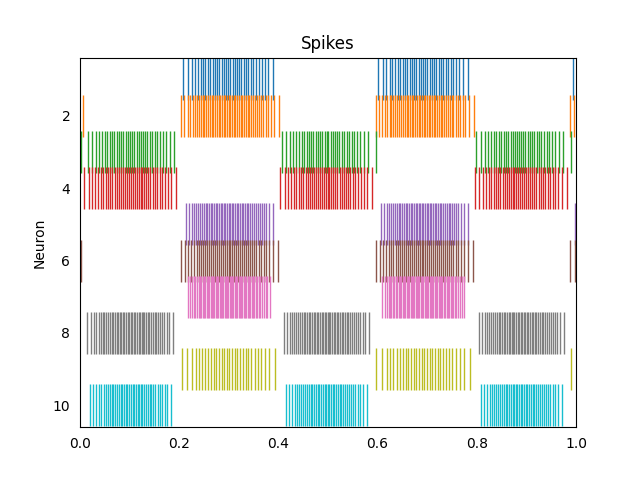

In [40]:
plt.figure()
plt.plot(sim.trange(), sim.data[filtered_ensemble])
plt.plot(sim.trange(), sim.data[stim_probe])
plt.legend(["Filtered Neuron Output", "Stimulus"], loc="lower right")
plt.xlim(0, t_max)

plt.figure()
rasterplot(sim.trange(), sim.data[spikes][:, :10])
plt.ylabel("Neuron")
plt.title("Spikes")
plt.xlim(0, t_max)

# Representing a Vector

In [33]:
net = nengo.Network(label="Vector Representation")
with net:
    stim_sin = nengo.Node(lambda t: np.sin(16 * t), label="Input")
    stim_cos = nengo.Node(lambda t: np.cos(16 * t), label="Input")

    vec = nengo.Ensemble(n_neurons=100, dimensions=2, radius=1, neuron_type=LIF(), max_rates=Uniform(100, 200),  label="x")
    nengo.Connection(stim_cos, vec[0])
    nengo.Connection(stim_sin, vec[1])
    stim_sin_probe = nengo.Probe(stim_sin)
    stim_cos_probe = nengo.Probe(stim_cos)
    filtered_ensemble = nengo.Probe(vec, synapse=0.01)

In [34]:
t_max = 1
with nengo.Simulator(net) as sim:
    sim.run(t_max)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(np.float64(-1.0999991027274083),
 np.float64(1.0999878147277855),
 np.float64(-1.099993191008054),
 np.float64(1.0999975418670345))

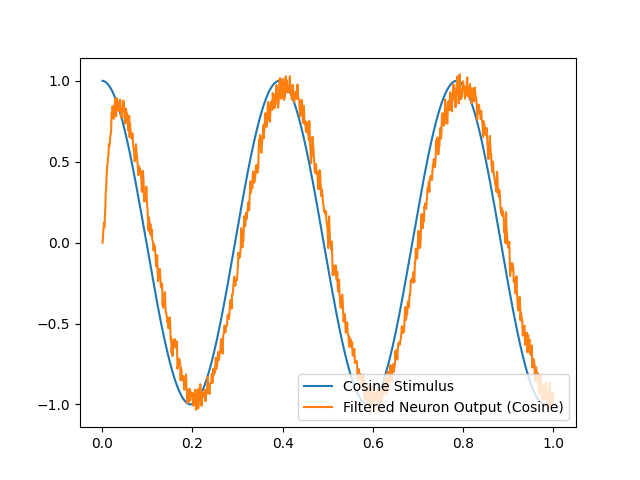

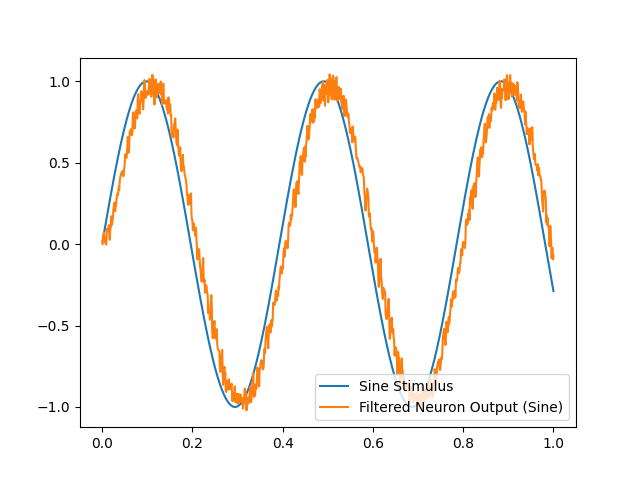

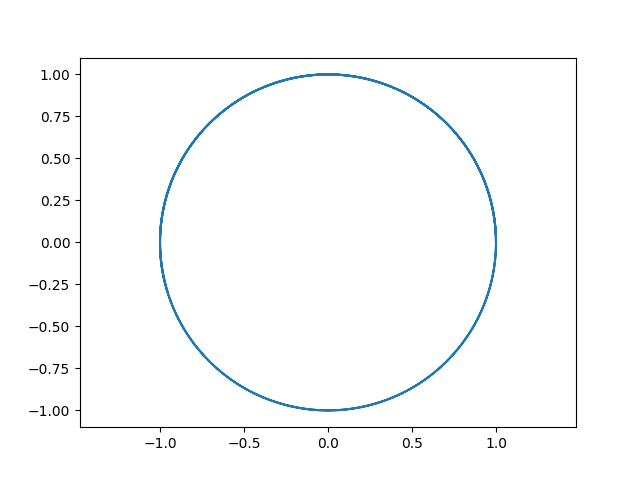

In [37]:
plt.figure()
plt.plot(sim.trange(), sim.data[stim_cos_probe])
plt.plot(sim.trange(), sim.data[filtered_ensemble][:, 0])
plt.legend(["Cosine Stimulus", "Filtered Neuron Output (Cosine)"], loc="lower right")

plt.figure()
plt.plot(sim.trange(), sim.data[stim_sin_probe])
plt.plot(sim.trange(), sim.data[filtered_ensemble][:, 1])
plt.legend(["Sine Stimulus", "Filtered Neuron Output (Sine)"], loc="lower right")

plt.figure()
plt.plot(sim.data[stim_cos_probe], sim.data[stim_sin_probe])
plt.axis("equal")